### Machine Learning approach - using sklearn library

In [113]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [94]:
df_startup = pd.read_csv('50_Startups_data.csv')

df_startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,153441.51,101145.55,407934.5400,Florida,221050.39
1,142107.34,91391.77,366168.4200,Florida,196187.94
2,165349.20,136897.80,444985.8024,New York,192261.83
3,162597.70,151377.59,443898.5300,California,191792.06
4,130298.13,145530.06,323876.6800,Florida,185752.60


In [95]:
col_list = df_startup.columns 

In [96]:
col_list

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [97]:
col_list = [x.lower() for x in col_list]

In [98]:
col_list = [x.replace(" ", "_") for x in col_list]
col_list

['r&d_spend', 'administration', 'marketing_spend', 'state', 'profit']

In [99]:
df_startup.columns = col_list

In [100]:
X = df_startup.drop(columns = 'profit')
Y = df_startup.profit


In [101]:
X.head()

,r&d_spend,administration,marketing_spend,state
0,153441.51,101145.55,407934.5400,Florida
1,142107.34,91391.77,366168.4200,Florida
2,165349.20,136897.80,444985.8024,New York
3,162597.70,151377.59,443898.5300,California
4,130298.13,145530.06,323876.6800,Florida


In [102]:
Y.head()

0    221050.39
1    196187.94
2    192261.83
3    191792.06
4    185752.60
Name: profit, dtype: float64

In [103]:


from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe = pd.get_dummies(X.state, drop_first = True, prefix = 'state')
ohe.head()



,state_Florida,state_New York
0,1,0
1,1,0
2,0,1
3,0,0
4,1,0


In [104]:
#Encoding 

ohe2 = pd.get_dummies(X, drop_first = True, prefix = 'state')
ohe2.head()


,r&d_spend,administration,marketing_spend,state_Florida,state_New York
0,153441.51,101145.55,407934.5400,1,0
1,142107.34,91391.77,366168.4200,1,0
2,165349.20,136897.80,444985.8024,0,1
3,162597.70,151377.59,443898.5300,0,0
4,130298.13,145530.06,323876.6800,1,0


In [105]:

ohe2_cols = ohe2.columns

ohe2_cols = [x.lower() for x in ohe2_cols]

ohe2.columns = ohe2_cols

In [106]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = ohe2
Y = Y

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [107]:
#checking the shape of the train and test data sets

collection = [X,Y,X_Train, X_Test, Y_Train, Y_Test]

for dataset in collection:
    print ('dataset',"shape is", dataset.shape)

dataset shape is (50, 5)
dataset shape is (50,)
dataset shape is (40, 5)
dataset shape is (10, 5)
dataset shape is (40,)
dataset shape is (10,)


In [90]:
#Training the Training data via Linear Regression

from sklearn.linear_model import LinearRegression

lr_object = LinearRegression()
lr_model = lr_object.fit(X_Train, Y_Train)

In [108]:
r_squared = lr_model.score(X_Train, Y_Train)

coefficients_training_data = list(zip(X_Train.columns,lr_model.coef_))

print('coefficients_training_data = ', coefficients_training_data)
print('intercept_training_data = ', lr_model.intercept_)
print('R-squared_training_data = ', r_squared)

coefficients_training_data =  [('r&d_spend', 0.7349064078018623), ('administration', 0.01725718506553676), ('marketing_spend', 0.056120401380998816), ('state_florida', 32851.69675602063), ('state_new york', 3559.127759868656)]
intercept_training_data =  42276.20060049133
R-squared_training_data =  0.9579630663734701


In [110]:
#Predicting the Y values using the LR model :

Y_Pred = lr_model.predict(X_Test)

#Summarizing the mean
mse = np.mean((Y_Test - Y_Pred)**2)/len(Y_Test)

root_mse = np.sqrt(mse)

root_mse

2212.3776586817407

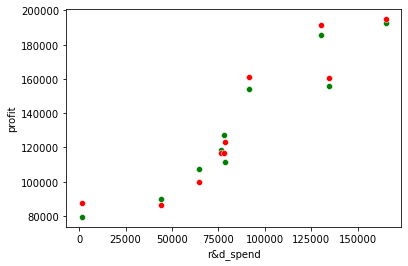

In [114]:
sns.scatterplot(x=X_Test["r&d_spend"], y=Y_Test, color='g')   #Actual
sns.scatterplot(x=X_Test["r&d_spend"], y=Y_Pred, color='r')   #Predicted
#plt.plot([100000, 100000], [200000, 200000], linewidth=2)
plt.show()

In [ ]:
# Thus we can see that the predicted values are close to the test values

In [119]:
#Checking with statsmodels as well

import statsmodels.api as sm

X = X_Train
Y = Y_Train

X = sm.add_constant(X)

reg_model_sm = sm.OLS(Y,X).fit()

print(reg_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     155.0
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           2.21e-22
Time:                        00:55:59   Log-Likelihood:                -421.98
No. Observations:                  40   AIC:                             856.0
Df Residuals:                      34   BIC:                             866.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.228e+04   9093.586     

In [120]:
reg_model_sm.params

const              42276.200600
r&d_spend              0.734906
administration         0.017257
marketing_spend        0.056120
state_florida      32851.696756
state_new york      3559.127760
dtype: float64

In [121]:
coefficients_training_data

[('r&d_spend', 0.7349064078018623),
 ('administration', 0.01725718506553676),
 ('marketing_spend', 0.056120401380998816),
 ('state_florida', 32851.69675602063),
 ('state_new york', 3559.127759868656)]

In [ ]:
#Thus we can see that the results for coefficients are nearly identical

***